# Project 3: Wrangling WeRateDogs Twitter Account

# 0.1 Gather 

In [1]:
import pandas as pd
import numpy as np 
import tweepy 
import requests
import re 
import warnings 
import json
import datetime as dt 
import time

In [2]:
tweet_df = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file: 
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [4]:
consumer_key = 'hO3pCD3QeSmYE1RMm9XySwp8k'
consumer_secret = '9Ay2pIxoMe4AcruHp5ivebFSk4FhVqod40qaYVm2rcjSjpSATs'
access_token = '1060333099471568897-wsRKQXpg4lZHmp96CUnCuSBaiOUuE0'
access_secret = 'j92mqoOojWBZ4Lf3m9UAuNohgvqyGX3p0P504hMmnhooi'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
with open('tweet_json.txt', 'a', encoding='utf-8') as f:
    for tweet_id in tweet_df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 612
Rate limit reached. Sleeping for: 602
Rate limit reached. Sleeping for: 1


In [6]:
tweet_data = []
error_data = []

start = time.time()

for tweet_id in tweet_df['tweet_id']: 
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        favorite_count = page['favorite_count']
        retweet_count = page['retweet_count']
        
        tweet_data.append({'tweet_id': int(tweet_id), 
                          'favorite_count': int(favorite_count), 
                          'retweet_count': int(retweet_count)})
    except Exception as e:
        print(str(tweet_id) + "_" + str(e))
        error_data.append(tweet_id)
end = time.time()
print(end - start)

888202515573088257_[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921_[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937_[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329_[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744_[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320_[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705_[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648_[{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308_[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 595


827228250799742977_[{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832_[{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464_[{'code': 144, 'message': 'No status found with that ID.'}]
770743923962707968_[{'code': 144, 'message': 'No status found with that ID.'}]
754011816964026368_[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 611
Rate limit reached. Sleeping for: 620


41786.25254058838


In [7]:
e_list = []
for e in error_data:
    try:
        favorite_count = page['favorite_count']
        retweet_count = page['retweet_count']
        
        
        tweet_data.append({'tweet_id': int(tweet_id), 
                          'favorite_count': int(favorite_count), 
                          'retweet_count': int(retweet_count)})
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        e_list.append(e)

In [8]:
twitter_api = pd.DataFrame(tweet_data, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

twitter_api.to_csv('twitter_json.txt', encoding = 'utf-8', index = False)

twitter_api = pd.read_csv('twitter_json.txt', encoding = 'utf-8')

twitter_api

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38196,8365
1,892177421306343426,32745,6177
2,891815181378084864,24660,4089
3,891689557279858688,41512,8504
4,891327558926688256,39707,9206
5,891087950875897856,19932,3064
6,890971913173991426,11662,2028
7,890729181411237888,64454,18564
8,890609185150312448,27390,4205
9,890240255349198849,31435,7266


# 0.2 Assess

In [9]:
tweet_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
twitter_api

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38196,8365
1,892177421306343426,32745,6177
2,891815181378084864,24660,4089
3,891689557279858688,41512,8504
4,891327558926688256,39707,9206
5,891087950875897856,19932,3064
6,890971913173991426,11662,2028
7,890729181411237888,64454,18564
8,890609185150312448,27390,4205
9,890240255349198849,31435,7266


In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id          2356 non-null int64
favorite_count    2356 non-null int64
retweet_count     2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
all_columns = pd.Series(list(twitter_api) + list(tweet_df) + list(image_predictions))
all_columns[all_columns.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

In [16]:
twitter_api[twitter_api.tweet_id.duplicated()]

,tweet_id,favorite_count,retweet_count
2342,666020888022790149,2541,507
2343,666020888022790149,2541,507
2344,666020888022790149,2541,507
2345,666020888022790149,2541,507
2346,666020888022790149,2541,507
2347,666020888022790149,2541,507
2348,666020888022790149,2541,507
2349,666020888022790149,2541,507
2350,666020888022790149,2541,507
2351,666020888022790149,2541,507


In [17]:
tweet_df[tweet_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
list(tweet_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [20]:
list(image_predictions)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [21]:
list(twitter_api)

['tweet_id', 'favorite_count', 'retweet_count']

In [22]:
tweet_df[tweet_df['name'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [23]:
image_predictions.loc[(image_predictions['p1_dog']==False) & (image_predictions['p2_dog']==False) & (image_predictions['p3_dog']==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [24]:
tweet_df.loc[(tweet_df['pupper']=='None') & (tweet_df['puppo']=='None') & (tweet_df['floofer']=='None') & (tweet_df['doggo']=='None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [25]:
twitter_api.describe()

,tweet_id,favorite_count,retweet_count
count,2.356000e+03,2356.000000,2356.000000
mean,7.417684e+17,7963.873090,2934.567487
std,6.837209e+16,12347.224385,4948.620141
min,6.660209e+17,0.000000,0.000000
25%,6.776996e+17,1400.000000,583.750000
50%,7.178159e+17,3462.000000,1365.500000
75%,7.986755e+17,9778.750000,3417.500000
max,8.924206e+17,164861.000000,84041.000000


In [26]:
tweet_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
tweet_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
113,870726314365509632,8.707262e+17,16487760.0,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
2108,670452855871037440,NaN,NaN,2015-11-28 04:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog can't see its haters. 11/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670452855...,11,10,None,None,None,None,None
899,758828659922702336,NaN,NaN,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758828659...,13,10,None,doggo,None,None,None
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None


In [29]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
782,690005060500217858,https://pbs.twimg.com/media/CZNj8N-WQAMXASZ.jpg,1,Samoyed,0.270287,True,Great_Pyrenees,0.114027,True,teddy,0.072475,False
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
1468,778990705243029504,https://pbs.twimg.com/media/Cs-H5uhWcAAiNY9.jpg,2,cocker_spaniel,0.715351,True,Labrador_retriever,0.207056,True,Chihuahua,0.028519,True
494,675710890956750848,https://pbs.twimg.com/media/CWCbd8ZWoAAtqoH.jpg,2,standard_schnauzer,0.441427,True,miniature_schnauzer,0.248885,True,Sealyham_terrier,0.164967,True


In [30]:
twitter_api.sample(5)

,tweet_id,favorite_count,retweet_count
772,775350846108426240,10857,4279
1464,693590843962331137,5336,2114
1030,743609206067040256,4723,1480
1547,688385280030670848,9787,4779
854,761976711479193600,5750,2197


In [31]:
image_predictions.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [32]:
tweet_df.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [33]:
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [34]:
tweet_df[tweet_df.text.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality

tweet_df

- erroneous datatypes(in_reply_to_status_id, in_reply_to_user_id, tweet_id, retweeted_status_id, retweeted_status_user_id, numerator, denominator)
- timestamp, retweeted_timestamp must be changed into proper datetime group 
- Missing retweeted_status_id, retweeted_status_timestamp, retweeted_user_id, in_reply_to_status_id, in_reply_to_user_id values
- additional characters in front of URL  

image_predictions

- some lowercase, some uppercase dog types (p1, p2, p3) 
- remove retweets
- P2 and P3 conf is sometimes over 1 
- multiple records for the same image

twitter_api

### Tidiness

- doggo, floofer, pupper, and puppo should be in one column: dog_type 
- Merge two tables: twitter_api and tweet_df on tweet_id

# 0.3 Clean

### 0.4.1 Merging Tables (Tidyness) 

- Merge two tables: twitter_api and tweet_df on tweet_id

#### Define

 - use merge function to merge the two tables on tweet_id

#### Code

In [35]:
# First, create copies of the DataFrames to preserve the originals for reproducibility

tweet_df_copy = tweet_df.copy()

image_predictions_copy = image_predictions.copy()

twitter_api_copy = twitter_api.copy()

In [36]:
tweet_df_copy = pd.concat([tweet_df_copy, twitter_api_copy], join='outer', sort=False)

#### Test

In [37]:
tweet_df_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,NaN,NaN


### 0.3.1 Erroneous Datatypes

- erroneous datatypes(in_reply_to_status_id, in_reply_to_user_id, tweet_id, retweeted_status_id, retweeted_status_user_id, numerator, denominator)

#### Define

- change tweet_id datatype from int64 to object
- change rating_numerator datatype from int64 to float
- change rating_denominator datatype from int64 ro float
(of note: the remaining datatypes: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, will be removed in a later cleaning step and do not need to be changed here) 

#### Code

In [38]:
tweet_df_copy.tweet_id = tweet_df_copy.tweet_id.astype('object')

#### Test

In [39]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4712 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      4712 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count             

### 0.3.2 Retweets

- Remove retweets

#### Define

- redefine dataframe to exclude retweets

#### Code 

In [40]:
tweet_df_copy = pd.DataFrame(tweet_df_copy)

In [41]:
tweet_df_copy = tweet_df_copy.loc[pd.isnull(tweet_df_copy['in_reply_to_status_id'])]

#### Test

In [42]:
tweet_df_copy.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,NaN,NaN


### 0.3.3 Time Stamp conversion to DateTime

- timestamp, retweeted_timestamp must be changed into proper datetime group 

#### Define

- use to_datetime to transform object datatype to datetime for the column date

#### Code

In [43]:
tweet_df_copy.timestamp = pd.to_datetime(tweet_df_copy.timestamp, yearfirst=True)

#### Test

In [44]:
tweet_df_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,NaN,NaN


In [45]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4634 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      4634 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null float64
rating_denominator            2278 non-null float64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
favorite_count       

### 0.3.4 Missing Values

- Missing retweeted_status_id, retweeted_status_timestamp, retweeted_user_id, in_reply_to_status_id, in_reply_to_user_id values
- retweet_status_id and in_reply_to_status_id seem like redundant columns 

#### Define

- remove retweet_status_id, in_reply_to_status_id, in_reply_to_user_id, and in_reply_to_status_id using drop 
- this resolves both of the above issues 
- this information is not really important to utilize the data for our purposes

#### Code

In [46]:
tweet_df_copy = tweet_df_copy.drop(['retweeted_status_id'], axis = 1)

In [47]:
tweet_df_copy = tweet_df_copy.drop(['retweeted_status_user_id'], axis = 1)

In [48]:
tweet_df_copy = tweet_df_copy.drop(['retweeted_status_timestamp'], axis = 1)

In [49]:
tweet_df_copy = tweet_df_copy.drop(['in_reply_to_status_id'], axis = 1)

In [50]:
tweet_df_copy = tweet_df_copy.drop(['in_reply_to_user_id'], axis = 1)

#### Text

In [51]:
tweet_df_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,NaN,NaN


### 0.3.5 Additional Characters 

- tweet_df column source has an additional '<ahref="' and an additional trail '"r...'

#### Define

- remove '<ahref="' and '"r...' using str subtraction

#### Code

In [52]:
tweet_df_copy.source = tweet_df_copy.source.astype(str).str[9:]

In [53]:
tweet_df_copy.source = tweet_df_copy.source.astype(str).str[:-39]

#### Test

In [54]:
tweet_df_copy.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
1631,684481074559381504,2016-01-05 21:06:19,http://twitter.com/download/iphone,Meet Pippa. She's an Elfin High Feta. Compact ...,https://twitter.com/dog_rates/status/684481074...,10.0,10.0,Pippa,None,None,None,None,NaN,NaN
484,814638523311648768,2016-12-30 01:05:33,http://twitter.com/download/iphone,This is Olivia. She's a passionate advocate of...,https://twitter.com/dog_rates/status/814638523...,12.0,10.0,Olivia,None,None,None,None,NaN,NaN
1572,686760001961103360,NaT,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3705.0,1477.0
1117,728986383096946689,NaT,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3319.0,879.0
1088,735274964362878976,NaT,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13656.0,5439.0


### 0.3.6 image predictions lowercase inconsistencies

- some lowercase, some uppercase dog types (p1, p2, p3) 

#### Define

- use lower to make p1, p2, and p3 columns lowercase

#### Code

In [55]:
image_predictions_copy['p1'] = image_predictions_copy.p1.str.lower()

image_predictions_copy['p2'] = image_predictions_copy.p2.str.lower()

image_predictions_copy['p3'] = image_predictions_copy.p3.str.lower()

#### Test

In [56]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### 0.3.7 P2 and P3 Confidence

- p2 and p3 confidence is sometimes over one 

#### Define

- replace confidence levels over one with one

#### Code 

In [57]:
image_predictions_copy[image_predictions_copy.p2_conf > 1] <- 1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [58]:
image_predictions_copy[image_predictions_copy.p3_conf > 1] <- 1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Test

In [59]:
image_predictions_copy.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
707,685169283572338688,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1,bernese_mountain_dog,0.975096,True,appenzeller,0.014578,True,entlebucher,0.005943,True
1848,839549326359670784,https://pbs.twimg.com/media/C6atpTLWYAIL7bU.jpg,1,swing,0.393527,False,norwich_terrier,0.052480,True,pembroke,0.049901,True
259,670782429121134593,https://pbs.twimg.com/media/CU8ZDu9WwAADg3N.jpg,1,chihuahua,0.952963,True,french_bulldog,0.036575,True,boston_bull,0.001977,True
1278,750101899009982464,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,2,golden_retriever,0.316704,True,llama,0.174269,False,labrador_retriever,0.147364,True


In [60]:
image_predictions_copy[image_predictions_copy.p3_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [61]:
image_predictions_copy[image_predictions_copy.p2_conf > 1] <- 1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### 0.3.8 Multiple Repeat jpgs 

- multiple records for the same image

#### Define

- use a duplicated function to remove repetitive images 

#### Code

In [62]:
image_predictions_copy = image_predictions_copy[~((image_predictions_copy.jpg_url.duplicated()) & image_predictions.jpg_url.notnull())]

#### Test

In [63]:
image_predictions_copy[image_predictions_copy.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## 0.4 Tidyness

### 0.4.1 Merging Columns

- doggo, floofer, pupper, and puppo should be in one column: dog_type 

#### Define

- use melt to merge columns 

#### Code

In [64]:
tweet_df_copy = pd.melt(tweet_df_copy, id_vars=['tweet_id', 'source', 'text', 'expanded_urls', 
                                                'rating_numerator', 'rating_denominator', 
                                                'name', 'timestamp', 'favorite_count', 'retweet_count'], var_name="dog_type")

In [65]:
tweet_df_copy = tweet_df_copy.drop(['value'], axis = 1)

#### Test 

In [66]:
tweet_df_copy

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,timestamp,favorite_count,retweet_count,dog_type
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,2017-08-01 16:23:56,NaN,NaN,doggo
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,2017-08-01 00:17:27,NaN,NaN,doggo
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,2017-07-31 00:18:03,NaN,NaN,doggo
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,2017-07-30 15:58:51,NaN,NaN,doggo
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,2017-07-29 16:00:24,NaN,NaN,doggo
5,891087950875897856,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,2017-07-29 00:08:17,NaN,NaN,doggo
6,890971913173991426,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,2017-07-28 16:27:12,NaN,NaN,doggo
7,890729181411237888,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,2017-07-28 00:22:40,NaN,NaN,doggo
8,890609185150312448,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,2017-07-27 16:25:51,NaN,NaN,doggo
9,890240255349198849,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,2017-07-26 15:59:51,NaN,NaN,doggo


In [68]:
tweet_df_copy.to_csv('twitter_archive_master.csv', index=False)

# Analysis

In [5]:
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [6]:
# First we must read in the cleaned data set
df_master = pd.read_csv('twitter_archive_master.csv')

In [7]:
df_master

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,timestamp,favorite_count,retweet_count,dog_type
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,2017-08-01 16:23:56,NaN,NaN,doggo
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,2017-08-01 00:17:27,NaN,NaN,doggo
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,2017-07-31 00:18:03,NaN,NaN,doggo
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,2017-07-30 15:58:51,NaN,NaN,doggo
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,2017-07-29 16:00:24,NaN,NaN,doggo
5,891087950875897856,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,2017-07-29 00:08:17,NaN,NaN,doggo
6,890971913173991426,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,2017-07-28 16:27:12,NaN,NaN,doggo
7,890729181411237888,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,2017-07-28 00:22:40,NaN,NaN,doggo
8,890609185150312448,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,2017-07-27 16:25:51,NaN,NaN,doggo
9,890240255349198849,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,2017-07-26 15:59:51,NaN,NaN,doggo


In [8]:
# Taking the correlation metrics helps us understand each variable's relationship to one another
df_master.corr()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
tweet_id,1.000000,0.024164,-0.022247,0.503767,0.378341
rating_numerator,0.024164,1.000000,0.185600,NaN,NaN
rating_denominator,-0.022247,0.185600,1.000000,NaN,NaN
favorite_count,0.503767,NaN,NaN,1.000000,0.797092
retweet_count,0.378341,NaN,NaN,0.797092,1.000000


#### As the above chart shows, tweet id and rating numerator are positively correlated. This indicates that, as the author tweeted more often, the higher the rating became. This could be due to the fact that a high numerator became more characteristic of the twitter user and thus became more of a signature
#### Also, favorite count and retweet count are extremely positively correlated. Favorite and tweet counts are also positively correlated with tweet_id, suggesting that tweets increased in popularity with the passage of time/tweets.

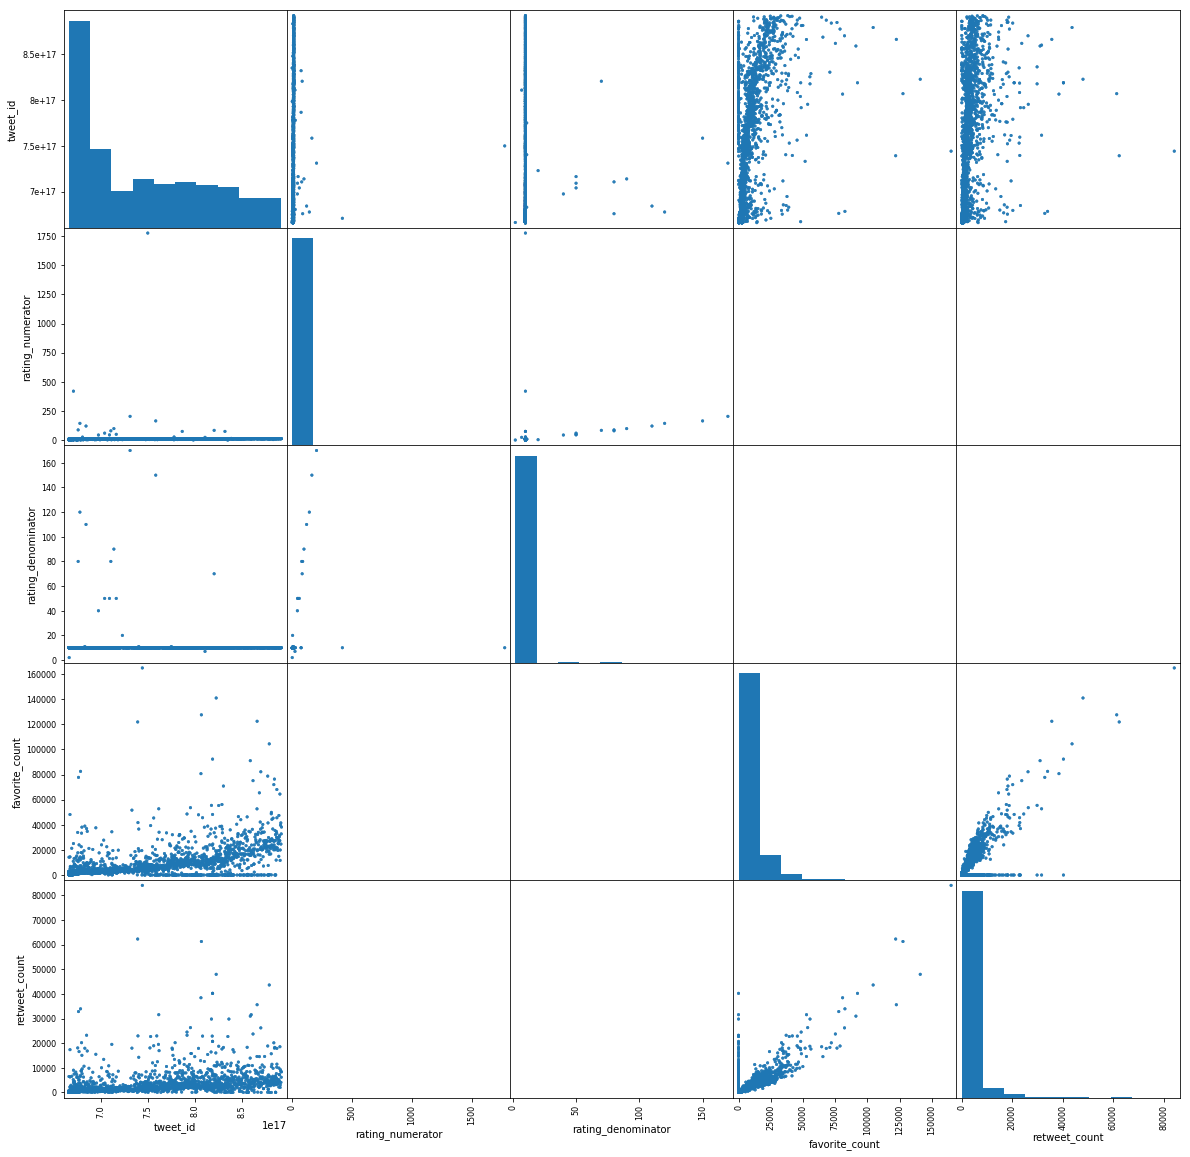

In [9]:
# The below plot shows a visual representation of the above correlation chart
pd.plotting.scatter_matrix(df_master, figsize = (20,20))
plt.show()

Text(0.5,1,'Favorite Count vs. Retweets for WeRateDogs Twitter Account')

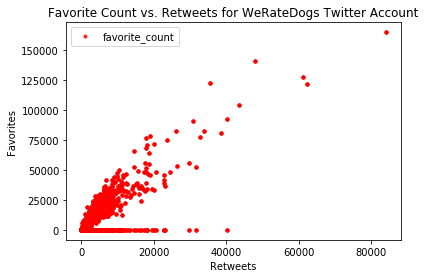

In [10]:
#This chart depicts the relationship between favorite and tweet count
df_master.plot(y = 'favorite_count', x = 'retweet_count', style = '.', alpha = .8, c = 'red')
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('Favorite Count vs. Retweets for WeRateDogs Twitter Account')

#### This plot demonstrates the obvious positive relationship between favorite count and retweet count, as they are both indicators of a tweet's popularity amongst users. What is interesting is the high amount of retweets for which there is little--to-no favorites, while the opposite is never true.

# Please Refer to Act Report PDF for More Analysis of Final Dataset